In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt , sklearn as sk

In [2]:
# Step 1: Load the dataset
f = pd.read_csv('Churn_Modelling.csv')
f

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
112542.58# Step 2: Copy the data and drop unnecessary columns
nf = f.copy()
nf.drop(columns=['CustomerId', 'Surname', 'RowNumber'], axis=1, inplace=True)
nf

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


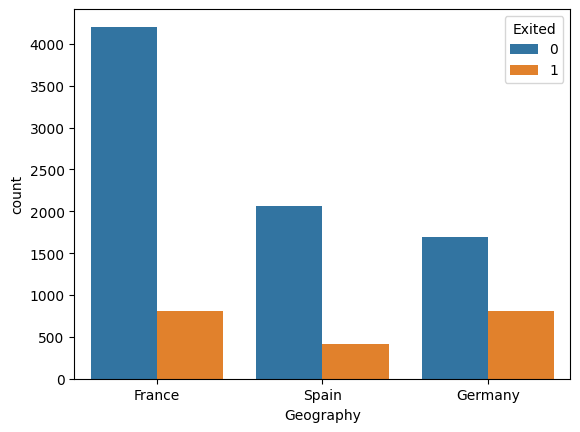

In [4]:
# Step 3: Exploratory Data Analysis (EDA)
sns.countplot(x='Geography', hue='Exited', data=nf)
plt.show()

In [5]:
# Step 4: Check basic statistics and data info
nf.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
nf.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [7]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
# Step 5: Encode 'Gender' column and one-hot encode 'Geography'
nf['Gender'] = nf['Gender'].map({'Male': 1, 'Female': 0})
new_ = pd.get_dummies(data=nf, columns=['Geography'], dtype='int')
new_f = pd.get_dummies(data=new_, columns=['NumOfProducts'], dtype='int')
new_f

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,1,0,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,1,0,96270.64,0,1,0,0,0,1,0,0
9996,516,1,35,10,57369.61,1,1,101699.77,0,1,0,0,1,0,0,0
9997,709,0,36,7,0.00,0,1,42085.58,1,1,0,0,1,0,0,0
9998,772,1,42,3,75075.31,1,0,92888.52,1,0,1,0,0,1,0,0


In [9]:
# Step 6: Handle missing values for 'Balance'
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0, strategy='mean')
new_f['Balance'] = imputer.fit_transform(new_f[['Balance']])
new_f.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,119827.493793,1,1,101348.88,1,1,0,0,1,0,0,0
1,608,0,41,1,83807.860000,0,1,112542.58,0,0,0,1,1,0,0,0
2,502,0,42,8,159660.800000,1,0,113931.57,1,1,0,0,0,0,1,0
3,699,0,39,1,119827.493793,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,0,43,2,125510.820000,1,1,79084.10,0,0,0,1,1,0,0,0


In [10]:
new_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  int64  
 10  Geography_Germany  10000 non-null  int64  
 11  Geography_Spain    10000 non-null  int64  
 12  NumOfProducts_1    10000 non-null  int64  
 13  NumOfProducts_2    10000 non-null  int64  
 14  NumOfProducts_3    10000 non-null  int64  
 15  NumOfProducts_4    10000 non-null  int64  
dtypes: float64(2), int64(14

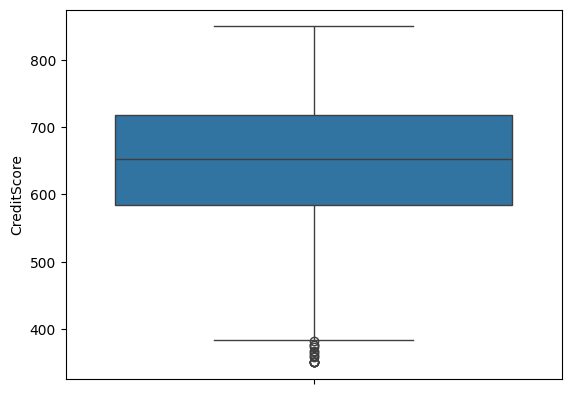

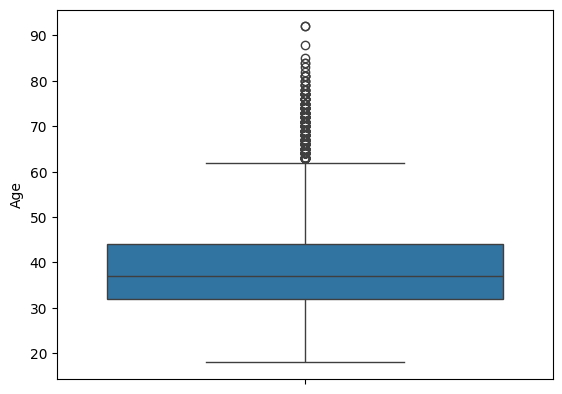

In [11]:
# Step 7: Visualize potential outliers in numerical columns
sns.boxplot(new_f['CreditScore'])
plt.show()
sns.boxplot(new_f['Age'])
plt.show()


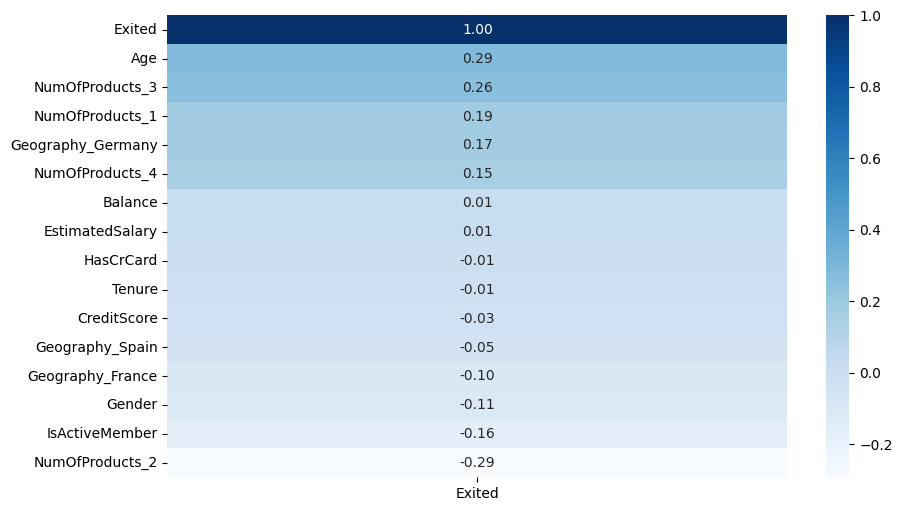

In [12]:
# Step 8: Correlation heatmap with 'Exited'
plt.figure(figsize=(10,6))
sns.heatmap(new_f.corr()[['Exited']].sort_values(by= 'Exited', ascending = False), cmap = 'Blues', annot = True, fmt = '.2f')
plt.show()

In [13]:
# Step 9: Define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    df_no_outliers = df.copy()
    for column in columns:
        if column in df_no_outliers.columns:
            Q1 = df_no_outliers[column].quantile(0.25)
            Q3 = df_no_outliers[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_no_outliers = df_no_outliers[(df_no_outliers[column] >= lower_bound) & (df_no_outliers[column] <= upper_bound)]
        else:
            print(f"Warning: Column '{column}' does not exist in the DataFrame.")
    return df_no_outliers

In [14]:
# Step 10: Remove outliers for specific columns
col = ['Age', 'CreditScore', 'Balance']
newF = remove_outliers_iqr(new_f, col)

In [15]:
newF

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,119827.493793,1,1,101348.88,1,1,0,0,1,0,0,0
3,699,0,39,1,119827.493793,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,0,43,2,125510.820000,1,1,79084.10,0,0,0,1,1,0,0,0
5,645,1,44,8,113755.780000,1,0,149756.71,1,0,0,1,0,1,0,0
6,822,1,50,7,119827.493793,1,1,10062.80,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,726,1,36,2,119827.493793,1,0,195192.40,0,0,0,1,1,0,0,0
9994,800,0,29,2,119827.493793,0,0,167773.55,0,1,0,0,0,1,0,0
9995,771,1,39,5,119827.493793,1,0,96270.64,0,1,0,0,0,1,0,0
9997,709,0,36,7,119827.493793,0,1,42085.58,1,1,0,0,1,0,0,0


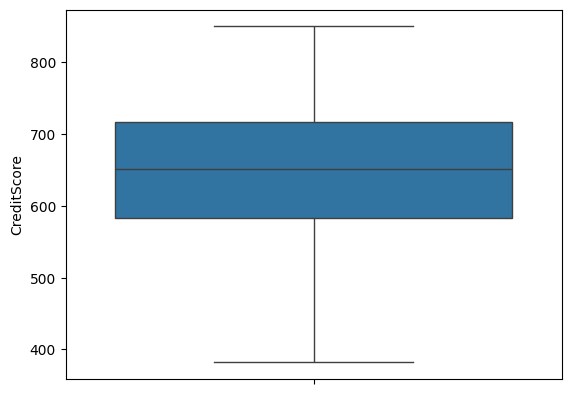

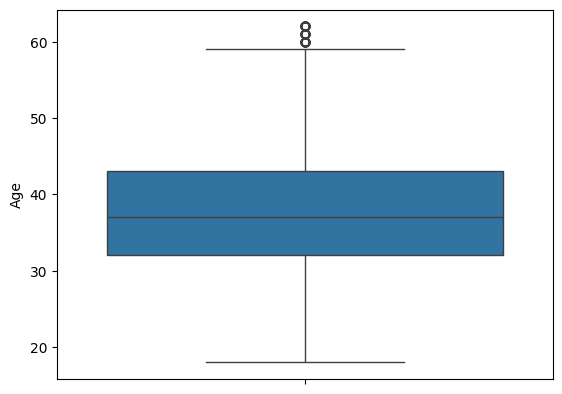

In [16]:
# Step 11: Check the boxplots after outlier removal
sns.boxplot(newF['CreditScore'])
plt.show()
sns.boxplot(newF['Age'])
plt.show()


In [17]:
# Step 12: Check the data structure and statistics again
newF.describe().T


,count,mean,std,min,25%,50%,75%,max
CreditScore,7920.0,650.579545,96.236720,382.00,583.0000,651.000000,717.2500,850.00
Gender,7920.0,0.546338,0.497880,0.00,0.0000,1.000000,1.0000,1.00
Age,7920.0,37.778030,8.780120,18.00,32.0000,37.000000,43.0000,62.00
Tenure,7920.0,5.023864,2.885150,0.00,3.0000,5.000000,7.0000,10.00
Balance,7920.0,119700.570472,12631.695918,87471.63,116646.1425,119827.493793,122490.1725,151772.63
HasCrCard,7920.0,0.707197,0.455078,0.00,0.0000,1.000000,1.0000,1.00
IsActiveMember,7920.0,0.501894,0.500028,0.00,0.0000,1.000000,1.0000,1.00
EstimatedSalary,7920.0,100161.348833,57701.541964,11.58,50910.6775,100145.565000,149584.7325,199992.48
Exited,7920.0,0.199874,0.399931,0.00,0.0000,0.000000,0.0000,1.00
Geography_France,7920.0,0.511869,0.499891,0.00,0.0000,1.000000,1.0000,1.00


In [18]:
# Step 13: Split data into features (X) and target (y)
x = newF.drop('Exited', axis=1)
x.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,119827.493793,1,1,101348.88,1,0,0,1,0,0,0
3,699,0,39,1,119827.493793,0,0,93826.63,1,0,0,0,1,0,0
4,850,0,43,2,125510.820000,1,1,79084.10,0,0,1,1,0,0,0
5,645,1,44,8,113755.780000,1,0,149756.71,0,0,1,0,1,0,0
6,822,1,50,7,119827.493793,1,1,10062.80,1,0,0,0,1,0,0


In [19]:
y = newF['Exited']
y.head()

0    1
3    0
4    0
5    1
6    0
Name: Exited, dtype: int64

In [20]:
# Step 14: Scale the feature data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [21]:
x_sc = sc.fit_transform(x)
x_sc[:5]

array([[-0.32816517, -1.0973997 ,  0.48088592, -1.04814452,  0.01004864,
         0.64345412,  0.99621927,  0.02058188,  0.97653779, -0.56062883,
        -0.57579511,  1.04389164, -0.97900816, -0.16382248, -0.07726429],
       [ 0.50317085, -1.0973997 ,  0.13918338, -1.39476879,  0.01004864,
        -1.55411235, -1.00379508, -0.10979115,  0.97653779, -0.56062883,
        -0.57579511, -0.95795383,  1.02144195, -0.16382248, -0.07726429],
       [ 2.07231757, -1.0973997 ,  0.59478677, -1.04814452,  0.46000287,
         0.64345412,  0.99621927, -0.36530358, -1.02402591, -0.56062883,
         1.73672887,  1.04389164, -0.97900816, -0.16382248, -0.07726429],
       [-0.05798096,  0.91124501,  0.70868761,  1.03160109, -0.4706546 ,
         0.64345412, -1.00379508,  0.85956962, -1.02402591, -0.56062883,
         1.73672887, -0.95795383,  1.02144195, -0.16382248, -0.07726429],
       [ 1.78134997,  0.91124501,  1.39209269,  0.68497682,  0.01004864,
         0.64345412,  0.99621927, -1.56155684, 

In [22]:
# Step 15: Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc,y, test_size = 0.2, random_state=185,stratify = y)

In [23]:
# Step 16: Print shapes of the training and test sets
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(6336, 15) (1584, 15)
(6336,) (1584,)


In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=185)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [25]:
print(pd.Series(y_train_resampled).value_counts())

Exited
0    5070
1    5070
Name: count, dtype: int64


In [26]:
# Step 17: Train a KNN model with initial k=3
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [27]:
knn.fit(x_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

In [28]:
# Step 18: Check the accuracy on the training data
train_accuracy = knn.score(x_train, y_train)
print(f"Training Accuracy (k=3): {train_accuracy:.2f}")

Training Accuracy (k=3): 0.90


In [29]:
# Step 19: Make predictions on the test data
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix
y_pred = knn.predict(x_test)


In [30]:
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (k=3): {test_accuracy:.2f}")

Test Accuracy (k=3): 0.77


In [31]:
y_pred[:5]

array([0, 0, 0, 0, 0])

In [32]:
# Step 20: Hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors": np.arange(3, 72, 2)}
grd_model = GridSearchCV(KNeighborsClassifier(), param_grid, refit=True, verbose=2)
grd_model.fit(x_train_resampled, y_train_resampled)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=3; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_neighbors=5; total time=   0.2s
[CV] END ......................................n_neighbors=7; total time=   0.2s
[CV] END ......................................

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69,
       71])},
             verbose=2)

In [33]:
# Step 21: Get the best parameters from GridSearchCV
grd_model.best_params_['n_neighbors']


np.int64(3)

In [34]:
# Step 22: Train a new KNN model with the best k
knn_new = KNeighborsClassifier(n_neighbors=3)
knn_new.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
# Step 23: Make predictions with the optimized model
pred = knn_new.predict(x_test)

In [36]:
pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
xsc = sc.inverse_transform(x_test)
pd.DataFrame(xsc , columns= x.columns)

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,666.0,0.0,59.0,5.0,119827.493793,1.0,1.0,185123.09,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,0.0
1,708.0,1.0,32.0,3.0,151691.440000,1.0,1.0,172810.51,0.0,1.0,0.0,0.0,1.0,-3.469447e-18,0.0
2,850.0,0.0,45.0,5.0,127258.790000,1.0,1.0,192744.23,0.0,1.0,0.0,1.0,0.0,-3.469447e-18,0.0
3,655.0,0.0,51.0,3.0,119827.493793,0.0,1.0,15801.02,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,0.0
4,765.0,1.0,42.0,4.0,123311.390000,1.0,1.0,82868.34,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,656.0,0.0,48.0,9.0,119827.493793,1.0,1.0,85240.61,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,0.0
1580,681.0,1.0,46.0,0.0,105969.420000,1.0,0.0,5771.56,1.0,0.0,0.0,1.0,0.0,-3.469447e-18,0.0
1581,497.0,1.0,37.0,8.0,128650.110000,1.0,1.0,163641.53,0.0,0.0,1.0,0.0,1.0,-3.469447e-18,0.0
1582,557.0,0.0,28.0,7.0,146445.240000,1.0,0.0,184317.74,1.0,0.0,0.0,0.0,1.0,-3.469447e-18,0.0


In [38]:
x_test = pd.DataFrame(x_test)
x_test.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.160245,-1.097400,2.417200,-0.008272,0.010049,0.643454,0.996219,1.472527,0.976538,-0.560629,-0.575795,-0.957954,1.021442,-0.163822,-0.077264
1,0.596696,0.911245,-0.658123,-0.701520,2.532747,0.643454,0.996219,1.259130,-1.024026,1.783711,-0.575795,-0.957954,1.021442,-0.163822,-0.077264
2,2.072318,-1.097400,0.822588,-0.008272,0.598391,0.643454,0.996219,1.604614,-1.024026,1.783711,-0.575795,1.043892,-0.979008,-0.163822,-0.077264
3,0.045936,-1.097400,1.505994,-0.701520,0.010049,-1.554112,0.996219,-1.462104,0.976538,-0.560629,-0.575795,-0.957954,1.021442,-0.163822,-0.077264
4,1.189023,0.911245,0.480886,-0.354896,0.285872,0.643454,0.996219,-0.299716,0.976538,-0.560629,-0.575795,-0.957954,1.021442,-0.163822,-0.077264
5,-0.328165,0.911245,1.619894,1.031601,0.010049,0.643454,0.996219,0.400028,-1.024026,-0.560629,1.736729,-0.957954,1.021442,-0.163822,-0.077264
6,-0.982842,-1.097400,2.645002,-1.048145,-0.180606,0.643454,0.996219,-0.104120,0.976538,-0.560629,-0.575795,1.043892,-0.979008,-0.163822,-0.077264
7,0.087503,0.911245,-2.024933,1.031601,0.010049,-1.554112,-1.003795,0.215097,0.976538,-0.560629,-0.575795,-0.957954,1.021442,-0.163822,-0.077264
8,2.072318,-1.097400,-0.658123,-0.008272,0.010049,0.643454,0.996219,-1.669571,-1.024026,-0.560629,1.736729,1.043892,-0.979008,-0.163822,-0.077264
9,0.118678,0.911245,-0.885924,-0.008272,-0.349452,0.643454,0.996219,0.856644,-1.024026,1.783711,-0.575795,-0.957954,1.021442,-0.163822,-0.077264


In [39]:
# knn.predict(sc.transform([[608,	0,	41,	1	,83807.86	,1	,0	,1	,112542.58	,0	,0,	1]]))

In [40]:
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix
train_accuracy = knn.score(x_train, y_train)
test_accuracy = accuracy_score(y_test, pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.90
Test Accuracy: 0.85


In [41]:
# Print classification report and confusion matrix
from sklearn.metrics import accuracy_score ,classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1267
           1       0.68      0.50      0.57       317

    accuracy                           0.85      1584
   macro avg       0.78      0.72      0.74      1584
weighted avg       0.84      0.85      0.84      1584


Confusion Matrix:
[[1191   76]
 [ 159  158]]


In [42]:
print(confusion_matrix(y_test, y_pred))
print()
print(confusion_matrix(y_test, pred))

[[1005  262]
 [ 106  211]]

[[1191   76]
 [ 159  158]]


In [43]:
print("\nClassification Report on Test Data (Original Predictions):")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix on Test Data (Original Predictions):")
print(confusion_matrix(y_test, y_pred))

print("\nConfusion Matrix on Test Data (Best Parameters):")
print(confusion_matrix(y_test, pred))


Classification Report on Test Data (Original Predictions):
              precision    recall  f1-score   support

           0       0.90      0.79      0.85      1267
           1       0.45      0.67      0.53       317

    accuracy                           0.77      1584
   macro avg       0.68      0.73      0.69      1584
weighted avg       0.81      0.77      0.78      1584


Confusion Matrix on Test Data (Original Predictions):
[[1005  262]
 [ 106  211]]

Confusion Matrix on Test Data (Best Parameters):
[[1191   76]
 [ 159  158]]


In [44]:
newF

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,619,0,42,2,119827.493793,1,1,101348.88,1,1,0,0,1,0,0,0
3,699,0,39,1,119827.493793,0,0,93826.63,0,1,0,0,0,1,0,0
4,850,0,43,2,125510.820000,1,1,79084.10,0,0,0,1,1,0,0,0
5,645,1,44,8,113755.780000,1,0,149756.71,1,0,0,1,0,1,0,0
6,822,1,50,7,119827.493793,1,1,10062.80,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,726,1,36,2,119827.493793,1,0,195192.40,0,0,0,1,1,0,0,0
9994,800,0,29,2,119827.493793,0,0,167773.55,0,1,0,0,0,1,0,0
9995,771,1,39,5,119827.493793,1,0,96270.64,0,1,0,0,0,1,0,0
9997,709,0,36,7,119827.493793,0,1,42085.58,1,1,0,0,1,0,0,0


In [45]:
# Step 23: Predict for a new customer
# Assuming this is a new customer data with proper feature order:
new_customer = [[619, 0, 42, 2, 119827.49, 1, 1, 101348.88, 1, 0, 0, 1, 0, 0, 0]]  # Example new customer data

# Scale the new customer data using the same StandardScaler used for training
new_customer_scaled = sc.transform(new_customer)

# Predict the new customer data
new_customer_prediction = knn_new.predict(new_customer_scaled)

# Display the prediction result
if new_customer_prediction[0] == 1:
    print("The model predicts that this customer will exit.")
else:
    print("The model predicts that this customer will not exit.")


The model predicts that this customer will not exit.


c:\Users\AZAM KHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [46]:
new_customer = [[645,	1,	44	,8	,113755.780000	,1	,0	,149756.71	,0	,0	,1,	0,	1	,0	,0]] 
new_customer_scaled = sc.transform(new_customer)
new_customer_prediction = knn_new.predict(new_customer_scaled)

if new_customer_prediction[0] == 1:
    print("The model predicts that this customer will exit.")
else:
    print("The model predicts that this customer will not exit.")

The model predicts that this customer will not exit.


c:\Users\AZAM KHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
import pickle as pk 
pk.dump(knn , open('model.pkl' , 'wb'))

In [55]:
with open('scaler.pkl', 'wb') as scaler_file:
    pk.dump(sc, scaler_file)